<a href="https://colab.research.google.com/github/realBagher/Tensorflow_sandbox/blob/main/classification/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.9.2


In [2]:
from sklearn.datasets import load_breast_cancer  

In [3]:
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [10]:
data.frame

In [11]:
data.target.shape

(569,)

In [12]:
data.data.shape

(569, 30)

In [13]:
from sklearn.model_selection import train_test_split


x_train , x_test , y_train , y_test = train_test_split(data.data,data.target,test_size=0.33)
N,D = x_train.shape

In [14]:
print('shape_00 ',N,'shape_01 ',D)

shape_00  381 shape_01  30


In [15]:
import matplotlib.pyplot as plt

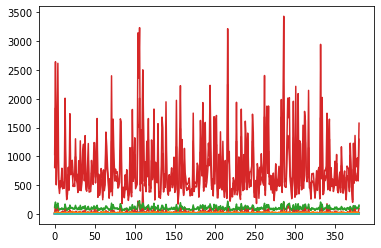

In [16]:
_ = plt.plot(x_train)

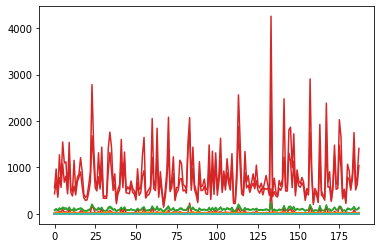

In [17]:
_ = plt.plot(x_test)

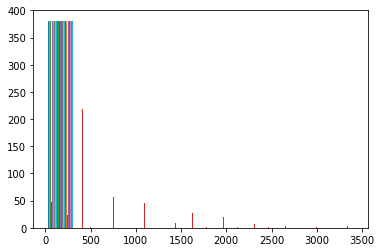

In [18]:
_ = plt.hist(x_train)

In [19]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

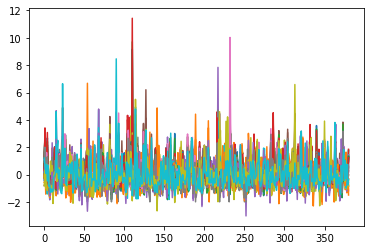

In [20]:
_ = plt.plot(x_train)

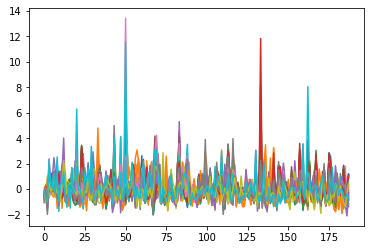

In [21]:
_ = plt.plot(x_test)

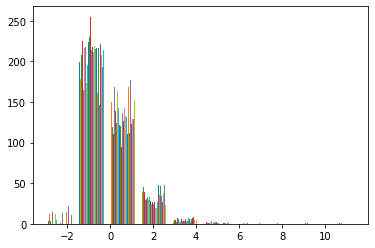

In [22]:
_ = plt.hist(x_train)

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 19ms/step - loss: 1.0453 - accuracy: 0.2966 - val_loss: 0.9141 - val_accuracy: 0.4255
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9445 - accuracy: 0.3438 - val_loss: 0.8260 - val_accuracy: 0.4628
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8538 - accuracy: 0.4383 - val_loss: 0.7491 - val_accuracy: 0.5372
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7769 - accuracy: 0.4934 - val_loss: 0.6817 - val_accuracy: 0.6117
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7094 - accuracy: 0.5722 - val_loss: 0.6239 - val_accuracy: 0.6596
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6168 - val_loss: 0.5743 - val_accuracy: 0.7021
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6013 - accuracy: 0.6693 - val_loss: 0.5321 - val_accuracy: 0.7287
Epoch 8/100


In [27]:
print('training data',model.evaluate(x_train,y_train))
print('test data',model.evaluate(x_test,y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.1182 - accuracy: 0.9711
training data [0.11816351115703583, 0.9711285829544067]
6/6 [==============================] - 0s 2ms/step - loss: 0.0894 - accuracy: 0.9734
test data [0.08935920149087906, 0.9734042286872864]


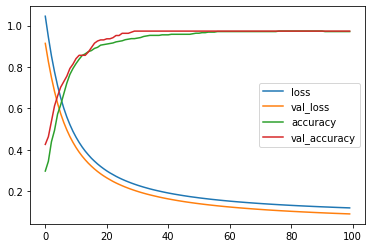

In [31]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()